[![build status](https://github.com/Aleboul/article/workflows/build/badge.svg)](https://github.com/Aleboul/article)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/computorg/{{< meta repo >}}/gh-pages?filepath=content.ipynb)
[![Creative Commons License](https://i.creativecommons.org/l/by/4.0/80x15.png)](http://creativecommons.org/licenses/by/4.0/)

#### Abstract {.unnumbered}

The modeling of dependence between random variables is an important subject in several 
applied fields of science. To this aim the copula function can be used as a margin-free 
description of the dependence structure. Several copulae belong to specific families such 
as Archimedean, Elliptical or Extreme. While software implementation of copulae has been 
thoroughly explored in R software, methods to work with copula in $\textsf{Python}$ are still in their 
infancy. To promote the dependence modeling with copula in $\textsf{Python}$, we have developed 
**COPPY**, a library that provides a range of random vector generation vector for copulae.

#### Keywords {.unnumbered}

Random number generation, copulas

# Introduction

Modeling dependence relations between random variables is a topic of interest in probability 
theory and statistics. The most popular approach is based on the second moment of the underlying 
random variables namely, the covariance. It is well known that only linear dependence can be 
captured by the covariance and it is characterizing only for a few models, \emph{e.g.} the 
multivariate normal distribution. As a beneficial alternative of dependence, the concept of copulae 
going back to @Skla59. The copula $C : [0,1]^d \rightarrow [0,1]$ of a random vector 
$\textbf{X} = (X_0, \dots, X_{d-1})$ with $d \geq 2$ allows us to separate the effect of dependence 
from the effect of the marginal distribution such as:

$$
    \mathbb{P}\left\{ X_0 \leq x_0, \dots, X_{d-1} \leq x_{d-1} \right\} = C\left(\mathbb{P} \{X_0 \leq x_0\}, \dots, \mathbb{P}\{X_{d-1} \leq x_{d-1} \}\right),
$$

where $(x_0, \dots, x_{d-1}) \in \mathbb{R}^d$. The main consequence of this identity
is that the copula completely characterizes the stochastic dependence between the
margins of $\textbf{X}$.

In other words, copulae allow to model marginal distributions and dependence structure 
separately. Furthermore, motivated by Sklar's theorem, the problem of investigating 
stochastic dependences is being reduced to the problem of investigating multivariate 
distribution function on the unit hypercube $[0,1]^d$ with uniform margins. The theory 
of copulae has been of prime interest for many applied fields of science, such as quantitative 
finance, actuarial or environmental sciences. This increasing number of applications has led 
to a demand for statistical methods. To name some, semiparametric estimation @10.2307/2337532, 
nonparametric estimation \cite{10.2307/3318798} of copulae where investigated while @10.2307/24586878, @PORTIER2018160
analyse the weak convergence of the nonparametric estimation of conditional copulae. Such 
results are established under a fixed arbitrary fixed dimension $d \geq 2$ but several 
investigations (see @10.2307/25463423, @10.1214/21-AOS2050) are done for functional data 
for the tail copula which capture the dependence in the upper tail. The empirical version of 
this function is shown to converge weakly to a Gaussian process which is similar in 
structure to the weak limit of the empirical copula process.

While software implementation of copulas has been thoroughly explored in *R*
software see, \emph{e.g.}, @evdR, @copulaR, @VineCopulaR, methods to work with copula
in $\textsf{Python}$ are still in their infancy. As far as we know, copulas devoted
module in $\textsf{Python}$ are mainly designed for modeling (see @CopulasPy, @CopulaePy).
These modules use maximum likelihood methods to estimate parametrically the copula
from observed data and propose to sample synthetic data through the estimated copula
model. Nevertheless, it does not allow to generate random numbers from a given copula
model where the user just have to specify the desired parameter. Furthermore, only
archimedean and elliptical families are investigated and the multivariate case has
barely been touched. Here, we propose to implement a wide range of copulas which
include the extreme value class and, if possible, in arbitrary fixed dimension
$d \geq 2$.

Through this article we adopt the following notational conventions such as all 
the indices will start at $0$ as in $\textsf{Python}$. Consider $(\Omega, \mathcal{A}, \mathbb{P})$ 
and let $\textbf{X} = (X_0, \dots, X_{d-1})$ be $d$-dimensional random vector with values 
in $(\mathbb{R}^d, \mathcal{B}(\mathbb{R}^d))$, with $d \geq 2$. This random vector has a 
joint distribution $F$ with copula $C$ and its margins are denoted by $F_j(x) = \mathbb{P}\{X_j \leq x\}$ 
for all $x \in \mathbb{R}$ and $j \in \{0, \dots, d-1\}$. Denote by $\textbf{U} = (U_0, \dots, U_{d-1})$ 
a $d$ random vector with copula $C$ and uniform margins. All bold letters $\textbf{x}$ will denote 
a vector.

The module **COPPY** is implemented using the object-oriented features of the $\textsf{Python}$ language. 
The classes are designed for Archimedean, elliptical, extreme value copulae. @sec-classes 
briefly presents the classes defined in the module. @sec-rng describes methods to generate
random vectors. @sec-pairwise presents an application of the **COPPY** in the field of 
modelization of pairwise dependence between maxima. @sec-discussion discusses some further 
improvements of the module and concludes. @sec-bv_arch - @sec-mv_ellip are devoted to define 
and illustrate all the parametric copula models implemented in the module.

# Classes {#sec-classes}

:::{#fig-diagram}
![](figures/diagram.png)

Object diagram that structure the code. The **Multivariate** class is the deepest root and serves 
to instantiate all its childs **Archimedean**, **Extreme**, **Gaussian**, **Student** in red. Grandchilds 
corresponds to some parametric copula models and are depicted in blue. Examples of methods are the 
great-grandchild colored in green.
:::

Three main classes are defined in the **COPPY** module : **Multivariate**, **Archimedean** and **Extreme** classes 
(see @fig-diagram for a description of the architecture of the code). The **Multivariate** 
class is designed to define multivariate copula (including the bivariate case) and is located at the highest 
level of the code architecture. As a generic class, it contains methods to instantiate the copula object 
or to sample from a copula with desired margins using inversion methods for example. At a second level, 
we may find its childrens, namely **Archimedean**, **Extreme** and **Gaussian** or **Student**. These 
are copulae which belong to different families of copulae, namely Archimedean and extreme value copula for 
**Archimedean** and **Extreme** and elliptical copula for **Gaussian** and **Student**. This partition 
is relevant theoretically as Archimedean and extreme value copulae are studied on their own (see 
@charpentier2009 or @genest2009rank to name a few) but also in practice as they contain effective 
sampling methods. However, **Gaussian** and **Student** classes are split as the most effective 
sampling algorithms are specific for each and cannot be generalized in a broader elliptical class. 
At the third level of the architecture, we may find some important Archimedean and extreme value 
copulae parametric models (depicted as blue in @fig-diagram). These parametric models 
contain methods such as the generator function $\varphi$ (see @sec-Arch) for the Archimedean 
and the Pickands dependence function $A$ (see @sec-Extreme) for the extreme value 
(in green in @fig-diagram). We recall in @sec-Arch the definition of Archimedean 
copulae and some of its properties in high dimensional spaces. A characterization of extreme value 
copulae is given in @sec-Extreme. For each section, the reader is referred to the 
to discover the wide range of copulae implemented in the module as @sec-bv_arch and 
@sec-mv_arch for Archimedean copulae, @sec-bv_ext and @sec-mv_ext for extreme value 
copulae and lastly @sec-mv_ellip} for Elliptical copulae.

## The Archimedean class {#sec-arch}

Let $\varphi$ be a generator which is a strictly decreasing, convex function from $[0,1]$ to $[0, \infty]$ 
such that $\varphi(1) = 0$ and $\varphi(0) = \infty$. We denote by $\varphi^\leftarrow$ the generalized 
inverse of $\varphi$. Let denote by

$$
 	C(\textbf{u}) = \varphi^\leftarrow (\varphi(u_0)+ \dots + \varphi(u_{d-1})).
$$ {#eq-arch_cop}

If this relation holds and $C$ is a copula function, then $C$ is called an Archimedean copula. A characterization 
for @eq-arch_cop to be a copula is that the generator needs to be a d-monotonic function, \emph{i.e.} $\varphi$ 
is differentiable there up to the order $d$ and the derivatives satisfy

$$
  (-1)^k \left(\varphi\right)^{(k)}(x) \geq 0, \quad k \in \{1, \dots, d\}
$$ {#eq-dmono}

for $x \in (0, \infty)$ (see corollary 2.1 of @10.1214/07-AOS556). It is peculiarly interesting to emphasize that 
$d$-monotone Archimedean inverse generators do not necessarily generate Archimedean copulae in dimensions higher than 
$d$. To that extent, some Archimedean subclasses are only implemented for the bivariate case as in a greater 
dimension, they do not generate an Archimedean copula. In the bivariate case, it is worth noticing that @eq-dmono can be interpreted as $\varphi$ be a convex function.

Implemented Archimedean copula classes in the module are commonly used one-parameter families, such as Clayton (@10.2307/2335289), 
Gumbel (@1960), Joe (@joe1997multivariate), Frank @Frank1979 and AMH (@ALI1978405) copulae for the multivariate case. 
Remark that every Archimedean copulae are always symmetric and in dimension $3$ or higher only positive association are allowed. 
For the specific bivariate case, other families such as numbers from 4.2.9 to 4.2.15 and 4.2.22 of Section $4.2$ of @nelsen2007introduction 
are implemented. We refer the reader to @sec-bv_arch and @sec-mv_arch for definitions and illustrations of these 
parametric copula models.

## The Extreme class {#sec-extreme}

Investigating the notion of copulae within the framework of multivariate extreme value theory leads to the so-called extreme value copulae 
(see @gudendorf2009extremevalue for an overview) defined as 
$$
C(\textbf{u}) = \exp \left( - \ell(-\ln(u_0), \dots, -\ln(u_{d-1})) \right), \quad \textbf{u} \in (0,1]^d,
$$ {#eq-evc}
with $\ell : [0,\infty)^d \rightarrow [0,\infty)$ the stable tail dependence function which is convex, homogeneous of order 
one, namely $\ell(c\textbf{x}) = c \ell(\textbf{x})$ for $c > 0$ and satisfies $\max(x_0,\dots,x_{d-1}) \leq \ell(x_0,\dots,x_{d-1}) \leq x_0+\dots+x_{d-1}, 
\forall \textbf{x} \in [0,\infty)^d$. Denote by $\Delta^{d-1} = \{\textbf{w} \in [0,1]^d : w_0 + \dots + w_{d-1} = 1\}$ the unit simplex. By 
homogeneity, $\ell$ is characterized by the \emph{Pickands dependence function} $A : \Delta^{d-1} \rightarrow [1/d,1]$, which 
is the restriction of $\ell$ to the unit simplex $\Delta^{d-1}$ :
$$
  \ell(x_0, \dots,x_{d-1}) = (x_0 + \dots + x_{d-1}) A(w_0, \dots, w_{d-1}), \quad w_j = \frac{x_j}{x_0 + \dots + x_{d-1}},
$${#eq-tail_dependence_pickands}
for $j \in \{1,\dots,d-1\}$ and $w_0 = 1 - w_1 - \dots - w_{d-1}$ with $\textbf{x} \in [0, \infty)^d \setminus \{\textbf{0}\}$.

From a practical point of view, the family of extreme value copulae is very rich and arises naturally as the limiting distribution of 
properly normalised component-wise maxima. Furthermore, it contains a rich variety of parametric models and allows asymmetric dependence. 
For the multivariate framework, the logistic copula (or Gumbel, see @1960) and the asymmetric logistic copula (@tawn1990) are implemented. 
We emphasize here that the logistic copula is the sole model that is both Archimedean and extreme value. Bivariate extreme value copulae which 
are included in the library are asymmetric logistic (@10.1093/biomet/75.3.397), asymmetric negative logistic (@Joe1990FamiliesOM), asymmetric 
mixed (@10.1093/biomet/75.3.397), Hüsler and Reiss (@HUSLER1989283), the t-EV (@Demarta_Mcneil),Bilogistic (@Smith1990), Dirichlet (
@BoldiDavison2007) models. The reader is again invited to the @sec-bv_ext and @sec-mv_ext for precise definitions of these models.


# Random number generator {#sec-rng}

We propose a $\textsf{Python}$-based implementation for generate random number from 
a wide variety of copula. **COPPY** requires some external packages in order to 
work. They are very few are freely available online.

- `NumPy` version 1.6.1 or newer. This is the fundamental package 
for scientific computing, it contains linear algebra functions and matrix / 
vector objects (@vanderwalt:inria-00564007).
- `SciPy` version 1.7.1 or newer. A library of open-source software
for mathematics, science and engineering (@jones_scipy:_2001).

The random vector generator methods in the code are *sample_unimargin* and *sample* for the **Multivariate** class. 
The first one generates a sample where margins are uniformly distributed on the unit segment $[0,1]$ while the second from the chosen margins. 
In @sec-biv_case, we present an algorithm used to sample from a copula using the conditioning method. This method is very general 
and may be used for every copula that is sufficiently smooth (see @eq-partial_deriv_arch, @eq-partial_deriv_pick and @eq-cond_dist_mv below). However, the practical 
infeasibility of the algorithm in a dimension higher than $2$ and the numerical inversion which is computationally intensive call for 
efficient ways to sample in greater dimensions. The purpose of @sec-mv_case is to present those methods and details those used in 
the module. In each Section, typical lines of codes are presented to instantiate a copula and to sample with **COPPY**.

In the sequel, all $\textsf{Python}$ code demonstration 
assumes	that the modules have been loaded :

In [1]:
from coppy.rng import base, evd, archimedean
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

## The bivariate case {#sec-biv_case}

In this subsection, we will address the problem of generating a bivariate sample from a specified joint distribution with $d = 2$. Suppose 
that we want to sample a bivariate random vector $\textbf{X}$ with copula $C$. If the components are independents, the procedure is straightforward 
as we can sample in one hand from $X_0$ and from $X_1$ on the other hand. In the case of copula, this case is only a special one.

One procedure to generate a pair $(u_0,u_1)$ from $\textbf{U}$ is the conditional distribution method. This method is convenient if the 
law of $U_1$ given $U_0$ can be easily sampled. An interesting property of copulae is the link between the conditional distribution and 
the derivative of the copula function (see @nelsen2007introduction, page 41), namely

$$
  c_{u_0}(u_1) \triangleq \mathbb{P}\left\{ U_1 \leq u_1 | U_0 = u_0 \right\} = \frac{\partial C(u_0,u_1)}{\partial u_0}.
$$ {#eq-cond_sim}

Thus, a convenient algorithm to simulate bivariate copula as long as the copula admits a first partial derivative with respect to its first component is given 
by Algorithm 1.

::: {#fig:alg_1}
![](figures/alg_1.png)
:::

For the sixth step of Algorithm 1, it is equivalent to find $u_1 \in [0,1]$ such that $c_{u_0}(u_1) - t_1 = 0$ holds. This $u_1$ always 
exists because for every $u \in ]0,1[$, $ 0 \leq c_{u_0}(u) \leq 1$ and that $u \mapsto c_{u_0}(u)$ is an increasing function 
(see Theorem 2.2.7 of \emph{op. cit.} for a proof). This step is solved using the \texttt{brentq} function from `SciPy` module. A 
sufficient condition in order that $C$ admits a first partial derivative in the Archimedean and extreme value case is that the generator $\varphi$ 
and the Pickands dependence function $A$ are continuously differentiable on $]0,1[$. Then the first partial derivatives of $C$ are given respectively by :

$$
	\frac{\partial C}{\partial u_0}(u_0,u_1) = \frac{\varphi'(u_0)}{\varphi'(C(u_0,u_1))}, \quad (u_0,u_1) \in ]0,1[^2,
$$ {#eq-partial_deriv_arch}

$$
	\frac{\partial C}{\partial u_0}(u_0,u_1) = \frac{\varphi'(u_0)}{\varphi'(C(u_0,u_1))}, \quad (u_0,u_1) \in ]0,1[^2,
$$ {#eq-partial_deriv_pick}

where $t = log(u_1) / log(u_0u_1) \in (0,1)$ and $\mu(t) = A(t) - tA'(t)$. 

We now have all the necessary theoretical tools to give details on how the **COPPY** module is designed. The file *base.py* contains the **Multivariate** 
class where the *sample* method sample from $\textbf{X}$ with copula $C$. To do so, we use the inversion method that is to sample from $\textbf{U}$ 
using Algorithm 1 and we compose the corresponding uniform margins by $F_j^\leftarrow$. @eq-cond_sim indicate that the sole knowledge of $A$ 
and $\varphi$ and their respective derivatives is needed in order to perform the sixth step of Algorithm 1. For that purpose, Algorithm 1 named as 
*cond_sim* in the code and is located inside the **Archimedean** and **Extreme** class. Then each child of the bivariate **Archimedean** 
(\emph{resp.} **Extreme**) class is thus defined by its generator $\varphi$ (resp. $A$), it's derivative $\varphi'$ (\emph{resp.} $A'$) and it's inverse 
$\varphi^\leftarrow$ as emphasized in greed in @fig-diagram. Namely, we perform Algorithm 1 for the **Archimedean** subclasses *Frank*, 
*AMH*, *Clayton* (when $\theta < 0$ for the previous three), *Nelsen_9*, *Nelsen_10*, *Nelsen_11*, *Nelsen_12*, *Nelsen_13*, *Nelsen_14*, 
*Nelsen_15* and *Nelsen_22*. For the **Extreme** class, such algorithm is performed for the *Asy_neg_log* and *Asy_mixed* models. 
For other models, faster algorithms are known and thus implemented, we refer to @sec-mv_case for details.

The following code illustrates the random vector generation for a bivariate Archimedean copula. By defining the parameter of the copula and the sample's 
length, constructor of this copulae are available and might be call using $Clayton()$ method such as :

In [2]:
  n_sample, theta = 1024, -0.5
  copula = archimedean.Clayton(theta = theta, n_sample = n_sample)

To obtain a sample with uniform margins and Clayton copula, we make use of the $\texttt{sample\_unimargin}$ as 

In [3]:
  sample = copula.sample_unimargin()

Here's, the $\texttt{sample}$ object is a $\texttt{Numpy}$ array with $2$ columns and $1024$ rows where each row contains a realization from a
 Clayton copula 

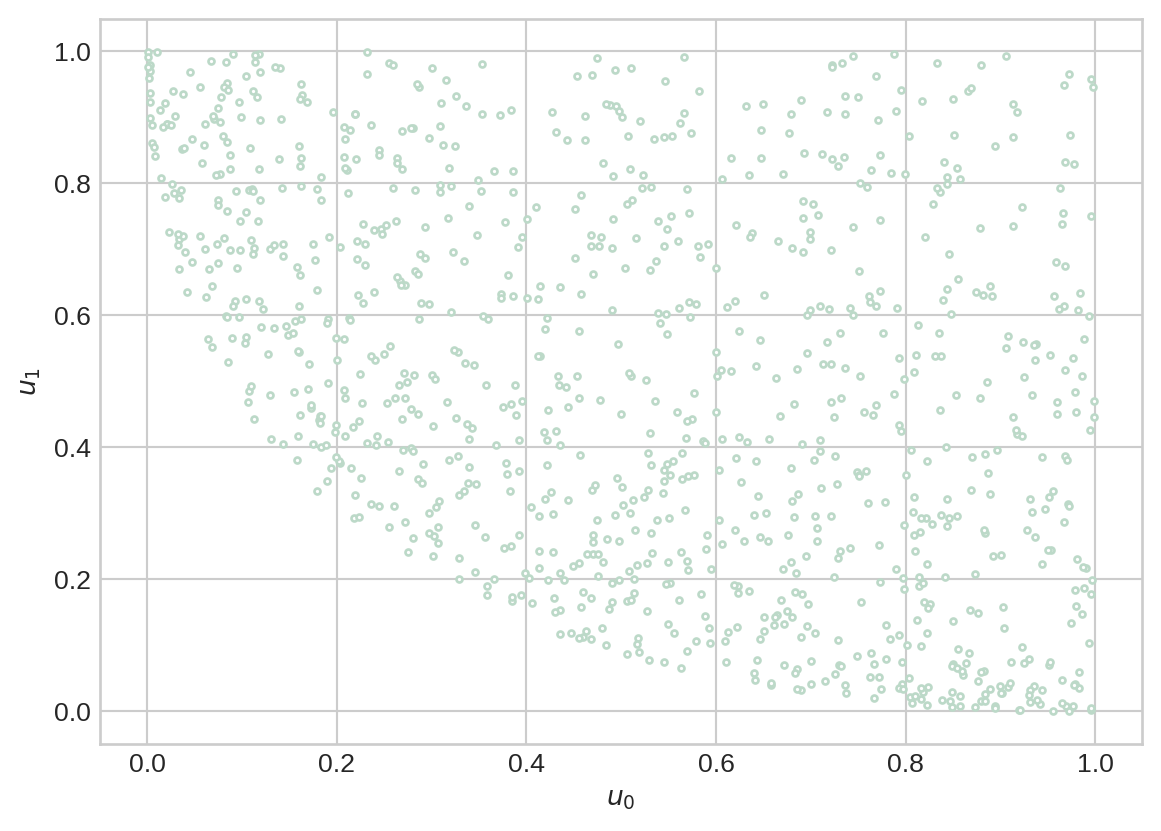

In [4]:
  seagreen = sns.light_palette("seagreen", as_cmap = True)
  fig, ax = plt.subplots()
  ax.scatter(sample[:,0], sample[:,1], color = 'white', edgecolor = seagreen(0.25),s = 5)
  ax.set_xlabel(r'$u_0$')
  ax.set_ylabel(r'$u_1$')
  plt.show()

## The multivariate case {#sec-mv_case}

We will now address the simulation of multivariate Archimedean and Extreme value copulae proposed on the $COPPY$ module. In the multivariate 
case, the link between partial derivatives conditioning remains. Indeed, let $(U_0, \dots, U_{d-1})$ be a $d$-dimensional random vector with uniform 
margins and copula $C$, the conditional distribution of $U_k$ given the values of $U_0, \dots, U_{k-1}$ is

$$
  \mathbb{P}\left\{ U_k \leq u_k | U_0 = u_0, \dots, U_{k-1} = u_{k-1} \right\} = \frac{\partial^{k-1} C(u_0, \dots, u_k,1,\dots,1)/\partial u_0 \dots \partial u_{k-1}}{\partial^{k-1} C(u_0, \dots, u_{k-1},1,\dots,1) / \partial u_0 \dots \partial u_{k-1}}
$$ {#eq-cond_dist_mv}

for $k \in \{1,\dots, d-1\}$. The conditional simulation algorithm may be written as follows.

1. Generate $d$ independent uniform random on $[0,1]$ variates $v_0, \dots, v_{d-1}$.
2. Set $u_0 = v_0$.
3. For $k = 1, \dots, d-1$, evaluate the inverse of the conditional distribution given by @eq-cond_dist_mv at $v_k$, to generate $u_k$.

Nevertheless, evaluation of the inverse conditional distribution becomes increasingly complicated as the dimension $d$ increases. Furthermore, 
it can be difficult for some models to derive a closed form of @eq-cond_dist_mv that makes it impossible to implement it in a general 
algorithm where only the dimension $d$ is an input. For multivariate Archimedean copulae, @10.1214/07-AOS556 give a method to generate a 
random vector from the $d$-dimensional copula $C$ with generator $\varphi$ (see Section 5.2 of *loc. cit.*). A stochastic representation 
for Archimedean copulae generated by a $d$-monotone generator is given by

$$
\textbf{U} = \left( \varphi^\leftarrow(R S_1), \dots, \varphi^\leftarrow(RS_d) \right) \sim C,
$$ {#eq-radial}

where $R \sim F_R$, the radial distribution which is independent of $S$ and $S$ is distributed uniformly in the unit simplex $\Delta^{d-1}$. 
One of challenging aspect of this algorithm is to have an accurate evaluation of the radial distribution of the Archimedean copula and thus to 
numerically inverse this distribution. The associated radial distribution for the $\textsf{Clayton}$ copula is given in Example 3.3 in the cited 
paper above while those of the $\textsf{Joe}$, $\textsf{AMH}$, $\textsf{Gumbel}$ and $\textsf{Frank}$ copulae are given in @hofert2012likelihood. 
In general, one can use numerical inversion algorithms for computing the inverse of the radial distribution, however it will leads to spurious 
numerical errors. Other algorithms exist when the generator is known to be the Laplace-Stieljes transform, denoted as $\mathcal{LS}$, of 
some positive random variable (see @10.2307/2289314, @frees1998understanding). This positive random variable is often referenced as the 
frailty distribution. In this framework, Archimedean copulae allow for the stochastic representation

$$
  \textbf{U} = \left( \varphi^\leftarrow (E_1/V), \dots, \varphi^\leftarrow(E_d /V)\right) \sim C,
$$ 

with $V \sim F = \mathcal{LS}^{-1}[\varphi^\leftarrow]$ the frailty and $E_1, \dots, E_d$ are distributed *i.i.d.* according to a standard 
exponential and independent of $V$. The algorithm to sample from this is thus :

::: {#fig:alg_2}
![](figures/alg_2.png)
:::

In this framework, we define $\texttt{\_frailty\_sim}$ method defined inside the $\textbf{Archimedean}$ class which performs Algorithm 2. 
Then, each Archimedean copula where the frailty distribution is known are thus defined by the generator $\varphi$, it's inverse $\varphi^\leftarrow$ 
and the frailty distribution denoted as $\mathcal{LS}^{-1}[\varphi^\leftarrow]$ as long as we know the frailty. This is the case for 
$\texttt{Joe}$, $\texttt{Clayton}$, $\texttt{AMH}$ or $\texttt{Frank}$.

For the extreme value case, algorithms have been proposed as in @stephenson2003simulating (see Algorithms 2.1 and 2.2) who proposes sampling methods 
for the Gumbel and the asymmetric logistic model. These algorithms are implemented in the **COPPY** module. Note that these algorithms are model-specific, 
thus the $\texttt{sample\_unimargin}$ method is exceptionally located in the corresponding child of the multivariate **Extreme** class.  Another procedure 
designed by @10.1093/biomet/asw008 to sample from multivariate extreme value models using extremal functions (see Algorithm 2 of the reference cited above) 
is also of prime interest. For the implemented models using this algorithm, namely Hüsler-Reiss, tEV, Bilogistic and Dirichlet models, a method called 
$\texttt{rExtFunc}$ is located inside each classes which allows to generate an observation from the according law of the extremal function.

Sample from the Gaussian and Student copula are directly given by Algorithm 5.9 and 5.10 respectively of @quantrisk. As each algorithm is model specific, 
the $\texttt{sample\_unimargin}$ method is located inside the **Gaussian** and **Student** classes.

We present how to construct a multivariate Archimedean copula and to generate random vectors from this model. Introducing the parameters of the copula, 
we appeal the following lines to construct our copula object :

In [5]:
d, theta, n_sample = 3, 2.0, 1024
copula = archimedean.Clayton(theta = theta, n_sample = n_sample, d = d)

We now call the $\texttt{sample\_unimargin}$ method to obtain vectors randomly generate.

In [6]:
sample = copula.sample_unimargin()

We thus represent in three dimensions these realizations below.

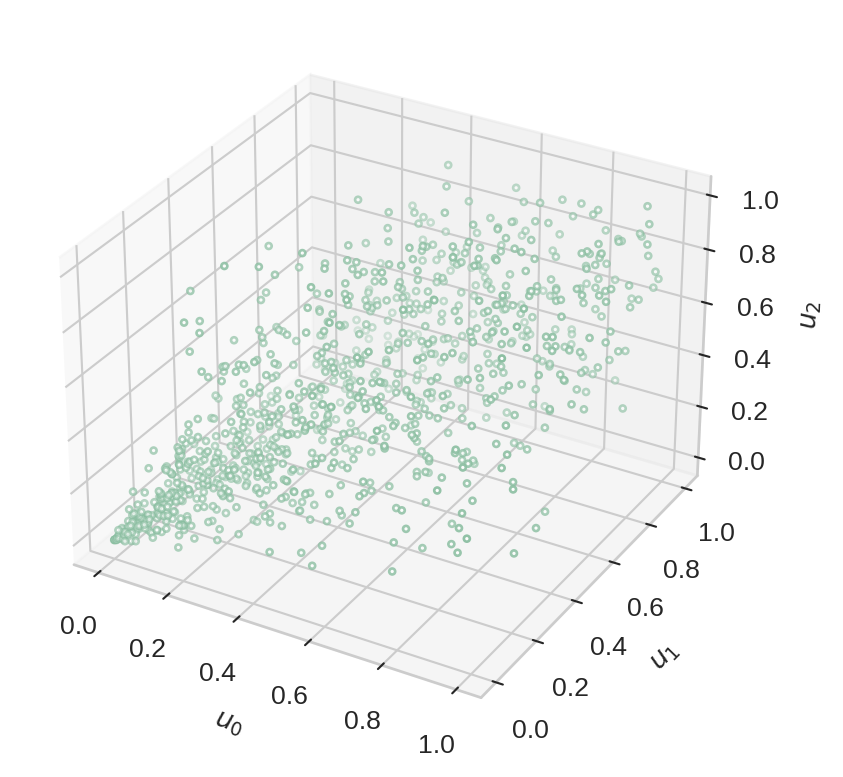

In [7]:
  fig = plt.figure()
  ax = fig.add_subplot(111, projection = '3d')
  ax.scatter3D(sample[:,0], sample[:,1], sample[:,2], s = 5, edgecolor = seagreen(0.5), color = 'white')
  ax.set_xlabel(r'$u_0$')
  ax.set_ylabel(r'$u_1$')
  ax.set_zlabel(r'$u_2$')

  plt.show()

# Case study : Modeling pairwise dependence between spatial maximas with missing data {#sec-pairwise}

We now proceed to a case study where we use our \textsf{Python} module to assess, under a finite sample framework, the asymptotic properties of 
an estimator of the $\lambda$-madogram when data are completely missing at random (MCAR). This case study comes from numerical results of @boulin2021non. The 
$\lambda$-madogram belongs to a family of estimators, namely the madogram, which is of prime interest in environmental sciences, as it is designed to model 
pairwise dependence between maxima in space, see \emph{e.g.} \cite{bernard:hal-03207469,BADOR201517,saunders} where the madogram was used as a dissimilarity 
measure to perform clustering. Where in several fields, for example econometrics (@woolridge2007) or survey theory (@chauvet2015), the MCAR hypothesis appears 
to be a strong hypothesis, this hypothesis is more realistic in environmental research as the missingness of one observation is usually due to instruments, 
communication and processing errors that may be reasonably supposed independent of the quantity of interest. In @sec-background, we define 
objects and properties of interests while in @sec-num we describe a detailed tutorial in $\textsf{Python}$ and with **COPPY** module to 
compare the asymptotic variance with an empirical counterpart of the $\lambda$-madogram with $\lambda = 0.5$.

## Background {#sec-background}

It was emphasized that the possible dependence between maxima can be described with the extreme value copula. This function is completely characterized by 
the Pickands dependence function (see @eq-tail_dependence_pickands}) where the latter is equivalent to the $\lambda$-madogram introduced by @naveau:hal-00312758
and defined as

$$ 
  \nu(\lambda) = \mathbb{E}\left[ \left|\{F_0(X_0)\}^{1/\lambda} - \{F_1(X_1)\}^{1/(1-\lambda)} \right|\right],
$$ {#eq-lmbd_mado}

with $\lambda \in (0,1)$ and if $\lambda = 0$ and $0<u<1$, then $u^{1/\lambda} = 0$ by convention. The latter quantity took its inspiration from the extensively 
used geostatistics tool, namely, the variogram (see Chapter 1.3 of @alma991005826659705596 for a definition and some classical properties). The $\lambda$-madogram 
can be interpreted as the $L_1$-distance between the uniform margins elevated to the inverse of the corresponding weights $\lambda$ and $1-\lambda$. This quantity 
describes the dependence structure between extremes by its relation with the Pickands dependence function, if we suppose that $C$ is an extreme value copula as 
in @eq-evc, we have

$$ 
  A(\lambda) = \frac{\nu(\lambda) + c(\lambda)}{1-\nu(\lambda) - c(\lambda)},
$$ {#eq-pickands_mado}

with $c(\lambda) = 2^{-1} (\lambda / (1-\lambda) + (1-\lambda)/\lambda)$ (see Proposition 3 of @MARCON20171 for details).

We consider independent and identically distributed *i.i.d.* copies $\textbf{X}_1, \dots, \textbf{X}_n$ of $\textbf{X}$. In presence of missing data, 
we do not observe a complete vector $\textbf{X}_i$ for $i \in \{1,\dots,n\}$. We introduce $\textbf{I}_i \in \{0,1\}^2$ which satisfies, $\forall j \in \{0,1\}$, 
$I_{i,j} = 0$ if $X_{i,j}$ is not observed. To formalize incomplete observations, we introduce the incomplete vector $\tilde{\textbf{X}}_i$ 
with values in the product space $\bigotimes_{j=1}^2 (\mathbb{R} \cup \{\textsf{NA}\})$ such as

$$
  \tilde{X}_{i,j} = X_{i,j} I_{i,j} + \textsf{NA} (1-I_{i,j}), \quad i \in \{1,\dots,n\}, \, j \in \{0,\dots, d-1\}.
$$

We thus suppose that we observe a $4$-tuple such as

$$ 
  (\textbf{I}_i, \tilde{\textbf{X}}_i), \quad i \in \{1,\dots,n\},
$$ {#eq-missing_2}

for all $i \in \{1, \dots,n \}$, $\textbf{I}_{i}$ are \emph{i.i.d} copies from $\textbf{I} = (I_0, I_1)$ where $I_j$ is distributed according to a Bernoulli 
random variable $\mathcal{B}(p_j)$ with $p_j = \mathbb{P}(I_j = 1)$ for $j \in \{0,1\}$. We denote by $p$ the probability of observing completely a realization 
from $\textbf{X}$, that is $p = \mathbb{P}(I_0=1, I_1 = 1)$. In @boulin2021non, hybrid and corrected estimators, respectively denoted as $\hat{\nu}_n^{\mathcal{H}}$ 
and $\hat{\nu}_n^{\mathcal{H*}}$, are proposed to estimate nonparametrically the $\lambda$-madogram in presence of missing data completely at random. Furthermore, 
a closed expression of their asymptotic variances for $\lambda \in ]0,1[$ is also given. This result is summarized in the following proposition.

::: {#thm-line}
## @boulin2021non

Let $(\textbf{I}_i, \tilde{\textbf{X}_i})_{i=1}^n$ be a samble given by @eq-missing_2. For $\lambda \in ]0,1[$, if $C$ is 
an extreme value copula with Pickands dependence function $A$, we have as $n \rightarrow \infty$
\begin{align*}
    &\sqrt{n} \left(\hat{\nu}_n^{\mathcal{H}}(\lambda) - \nu( \lambda)\right) \overset{d}{\rightarrow} \mathcal{N}\left(0, \mathcal{S}^{\mathcal{H}}(p_1,p_2,p, \lambda)\right), \\ 
    &\sqrt{n} \left(\hat{\nu}_n^{\mathcal{H}*}(\lambda) - \nu( \lambda)\right) \overset{d}{\rightarrow} \mathcal{N}\left(0, \mathcal{S}^{\mathcal{H}*}(p_1,p_2,p, \lambda)\right),
\end{align*}

where $\mathcal{S}^{\mathcal{H}}(p_1,p_2,p, \lambda)$ and $\mathcal{S}^{\mathcal{H}*}(p_1,p_2,p, \lambda)$ are the 
asymptoptic variances of the random variables.
:::

## Numerical results {#sec-num}
    
Benefiting of generating data with **COPPY** we are thus able, with Monte Carlo simulation, to assess theoretical results given by Theorem 1 in a finite sample setting. 
For that purpose, we implement a $\textsf{Monte\_Carlo}$ class (in $\texttt{monte\_carlo.py}$ file) which contains some methods to perform some Monte Carlo iterations for a given
extreme value copula. Before going any further, we have to import the necessary libraries

In [8]:
  from coppy.rng import base, evd, archimedean, monte_carlo
  from scipy.stats import norm, expon

  def gauss_function(x, x0, sigma):
      return np.sqrt( 1 / (2 * np.pi * sigma ** 2 ) ) * np.exp(- ( x - x0) ** 2 / (2 * sigma **2) )

We thus set up parameters to simulate our bivariate dataset. For this subsection, we choose the asymmetric negative logistic model (see @sec-bv_ext for a definition) 
with parameters $\theta = 10, \psi_1 = 0.1, \psi_2 = 1.0$. 

In [9]:
  np.random.seed(42)
  n_sample = 2048
  theta, psi1, psi2 = 10, 0.1, 1.0

We choose the standard normal and exponential as margins. To simulate this sample, the following lines should be typed:

In [10]:
  copula = evd.Asy_neg_log(theta = theta, psi1 = psi1, psi2 = psi2,
  n_sample = n_sample)
  sample = copula.sample(inv_cdf = [norm.ppf, expon.ppf])

The $2048 \times 2$ array \texttt{sample} contains $2048$ realization of the asymmetric negative logistic model where the first column is distributed according 
to a standard normal random variable and the second column as a standard exponential. This distribution is depicted below. To obtain it, one needs the following lines of command :

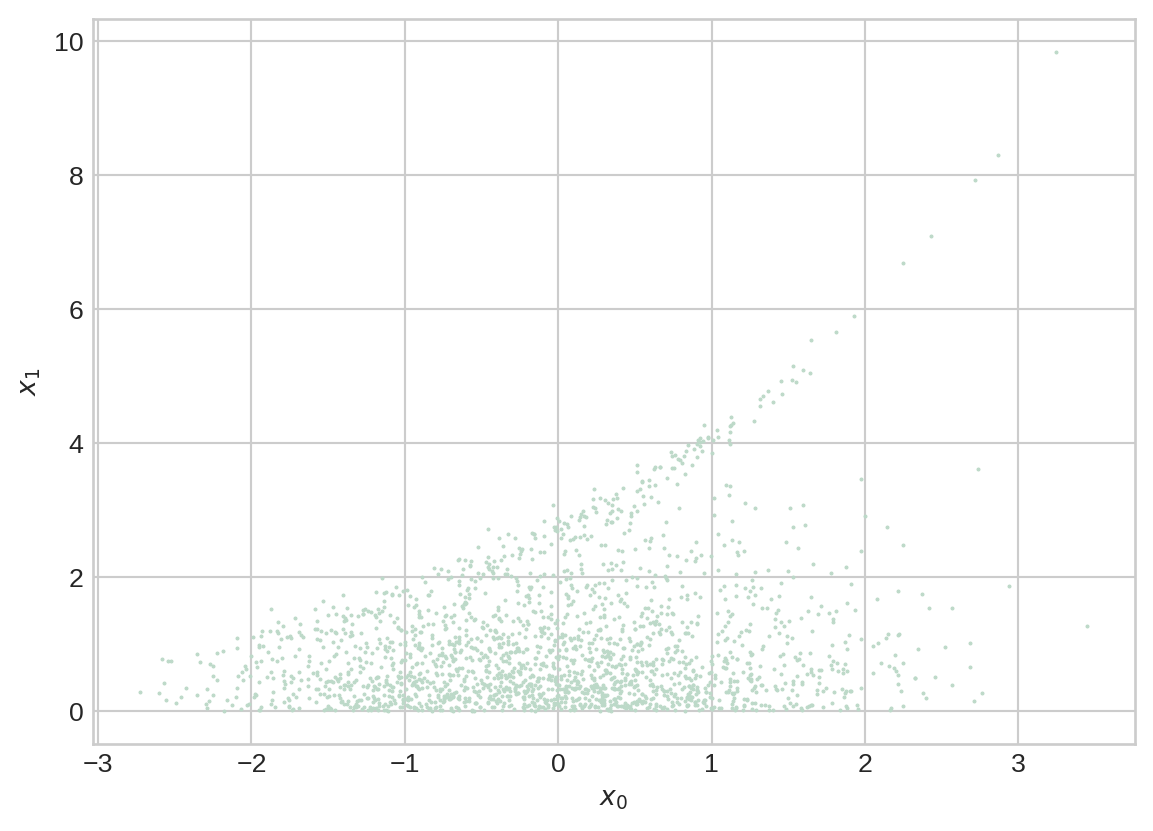

In [11]:
  seagreen = sns.light_palette("seagreen", as_cmap = True)
  fig, ax = plt.subplots()
  ax.scatter(sample[:,0], sample[:,1], color = seagreen(0.25),s = 1, marker = '.')
  ax.set_xlabel(r'$x_0$')
  ax.set_ylabel(r'$x_1$')
  plt.show()

Before going into further details, we will present the missing mechanism. Let $V_0$ and $V_1$ be random variables uniformly distributed under the $]0,1[$ segment with copula 
$C_{(V_0,V_1)}$. We set $I_0 = 1_{\{V_0 \leq p_0\}}$ and $ I_1 = 1_{\{V_1 \leq p_1\}}$. It is thus immediate that $I_0 \sim \mathcal{B}(p_0)$ and 
$I_1 \sim \mathcal{B}(p_1)$ and $p \triangleq \mathbb{P}\{I_0 = 1, I_1 =1 \} = C_{(V_0,V_1)}(p_0, p_1)$. For our illustration, we will take $C_{(V_0,V_1)}$ as a $\texttt{Joe}$ 
copula with parameter $\tau = 2.0$ (We refer to Appendix @sec-bv_arch} for a representation of this copula). Thereby, if $X_0$ is not observed, it is more likely to not 
observe $X_1$ also. *A contrario*, the observation of $X_0$ doesn't influence the observation of the other random variable $X_1$. Indeed, for this copula, more likely is to observe 
a realization $v_0 \geq 0.8$ from $V_0$ if $v_1 \geq 0.8$ from $V_1$. If we observe $v_1 < 0.8$, the realization $v_0$ is close to be independent of $v_1$. In climate studies, 
extreme events could damage the recording instrument in the surrounding regions where they occur, thus the missingness of one variable may depend from others. We initialize the 
copula $C_{(V_0,V_1)}$ by the following line

In [12]:
  copula_miss = archimedean.Joe(theta = 2.0, n_sample = n_sample)

For a given $\lambda \in ]0,1[$ we now want to estimate a $\lambda$-madogram with a sample simulate from the asymmetric negative logistic and where some observations would be 
of lack by the missing mechanism described above. We thus replicate this step several times to compute an empirical counterpart of the asymptotic variance. The $\texttt{Monte\_Carlo}$ 
object has been designed in this way : we specify the number of iterations $n_{iter}$ (take $n_{iter} = 1024$), the chosen extreme value copula (asymmetric negative logistic model), 
the missing mechanism (described by $C_{(V_0,V_1)}$ and $p_0 = p_1 = 0.9$) and $\lambda$ (noted $\texttt{w}$). We thus write the following lines :

In [13]:
  u = np.array([0.9, 0.9])
  n_iter, P, w = 1024, [[u[0], copula_miss._C(u)], [copula_miss._C(u), u[1]]], np.array([0.5,0.5])
  monte = monte_carlo.Monte_Carlo(n_iter = n_iter, n_sample = n_sample,
  copula = copula, copula_miss = copula_miss, w = w, P = P)

The $\texttt{Monte\_Carlo}$ object is thus initialized with all parameters needed. We may use the $\texttt{simu}$ method to generate a $\texttt{DataFrame}$ 
(a $\texttt{Pandas}$ object) composed out $1024$ rows and $3$ columns. Each row contains an estimate of the $\lambda$-madogram, $\hat{\nu}_n^{\mathcal{H}*}$ in Theorem 1 
($\texttt{FMado}$), the sample length $n$ ($\texttt{n}$) and the normalized estimation error ($\texttt{scaled}$). We thus call the $\texttt{simu}$ method.

In [14]:
  df_wmado = monte.finite_sample(inv_cdf = [norm.ppf, expon.ppf], corr = True)
  print(df_wmado.head())

      wmado       n    scaled
0  0.150451  2048.0 -0.153656
1  0.147472  2048.0 -0.288454
2  0.158530  2048.0  0.211972
3  0.153668  2048.0 -0.008084
4  0.153695  2048.0 -0.006827


Where $\texttt{corr = True}$ specifies that we compute the corrected estimator, $\hat{\nu}_n^{\mathcal{H}*}$ in Theorem 1. Now, using the $\texttt{var\_mado}$ method 
defined inside in the **Extreme** class, we obtain the asymptotic variance for the given model and parameters from the missing mechanism. We obtain this quantity as follows

In [15]:
  var_mado = copula.var_mado(w, p = copula_miss._C(u), P = P, corr = True)
  print(var_mado)
  print(df_wmado['scaled'].var())

0.015417245591834503
0.01717151507670374


We propose here to check numerically the asymptotic normality with variance $\mathcal{S}^{\mathcal{H}*}$ of the normalized estimation error of the corrected estimator. 
We have all data in hand and the asymptotic variance was computed by lines above. We thus write :

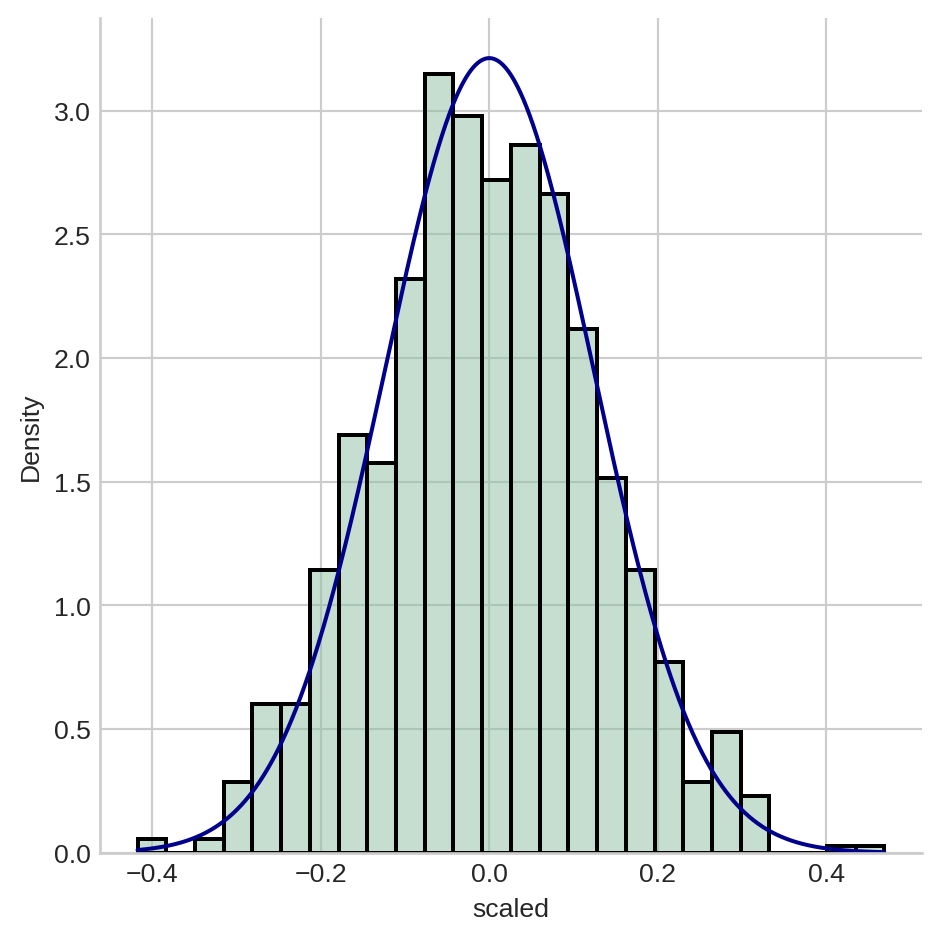

In [16]:
    sigma = np.sqrt(var_mado)
    x = np.linspace(min(df_wmado['scaled']), max(df_wmado['scaled']), 1000)
    gauss = gauss_function(x, 0, sigma)
    sns.displot(data = df_wmado, x = "scaled", color = seagreen(0.5),
    kind = 'hist', stat = 'density', common_norm = False,
    alpha = 0.5, fill = True, linewidth = 1.5)
    plt.plot(x,gauss, color = 'darkblue')

# Discussion {#sec-discussion}

This article presents the construction and some implementations of the $\textsf{Python}$ module **COPPY** for random copula sampling. This is a seminal work 
of software implement of copula modeling in $\textsf{Python}$ and there's much more to do. It is implicitly hoped that the potential diffusion of the 
software through everyone who need it may bring other implementations for multivariate modeling with copulae under $\textsf{Python}$. For example, 
choosing a copula to fit the data is an important but difficult problem. A robust approach to estimate copulae has been investigated recently by 
@alquier2020estimation using Maximum Mean Discrepancy. In link with our example, semiparametric estimation of copulae with missing data could be 
of great interest as proposed by @HAMORI201985.

Also, implement algorithm proposed by @10.1214/07-AOS556 to generate random vectors for Archimedean copulae has been tackled but, as expected, the numerical 
inversion gives spurious results especially where the parameter $\theta$ and the dimension $d$ are high. Furthermore, as the support of radial distribution 
is contained in the real line, the numerical inversion induces a greater time of computation. Further investigations are thus needed in order to generate 
random vectors from classical Archimedan models using the radial distribution.

A direction of improvement for the **COPPY** module is dependence modeling with Vine copula which has been recently a tool of high interest in the machine 
learning community see, \*e.g.*, @lopez2013gaussian, @Veeramachaneni2015CopulaGM, @Carrera2016VineCC, @10.5555/2946645.2946678 or 
@SunCuesta-InfanteVeeramachaneni2019. Therefore, it strengthens the need of dependence modeling with copulae in $\textsf{Python}$ as a not negligeable part 
of the machine learning community use this language. In link with this article, Vine copulae might be interesting to model dependencies between 
extreme as suggested by @SIMPSON2021104736, @nolde2021linking. Last, another copula model could be implemented to model further dependencies. These 
implementations will push forward the scope of dependence modeling with $\textsf{Python}$ and gives high quality usable tools for everyone in needs.



# References {.unnumbered}

::: {#refs}
:::

# Appendix {#appendices}

## Bivariate Archimedean models {#sec-bv_arch}

::: {#fig-bv_arch_1}
![](figures/app/arch_table_1.png){width=50%}
:::

::: {#fig-bv_arch_2}
![](figures/app/arch_table_2.png){width=50%}
:::

## Implemented bivariate extreme models {#sec-bv_ext}

::: {#fig-bv_ext}
![](figures/app/ext_table.png){width=50%}
:::

## Multivariate Archimedean copulae {#sec-mv_arch}

::: {#fig-mv_arch}
![](figures/app/arch_mv_table.png){width=50%}
:::

## Multivariate extreme models {#sec-mv_ext}

Before giving the main details, we introduce some notations. Let $B$ be the set of all nonempty subsets of $\{1,\dots,d\}$ 
and $B_1 = \{b \in B, |b| = 1\}$, where $|b|$ denotes the number of elements in thet set $b$. We note by $B_{(j)} = \{b \in B, j \in b\}$. 
For $d=3$, the Pickands is expressed as

::: {#eq-mv_ext}
\begin{align*}
 A(\textbf{w}) =& \alpha_1 w_1 + \psi_1 w_2 + \phi_1 w_3 + \left( (\alpha_2 w_1)^{\theta_1} + (\psi_2w_2)^{\theta_1} \right)^{1/\theta_1} + \left( (\alpha_3 w_2)^{\theta_2} + (\phi_2w_3)^{\theta_2} \right)^{1/\theta_2} \\ &+ \left( (\psi_3 w_2)^{\theta_3} + (\phi_3w_3)^{\theta_3} \right)^{1/\theta_3} 
  + \left( (\alpha_4 w_1)^{\theta_4} + (\psi_4 w_2)^{\theta_4} + (\phi_4 w_3)^{\theta_4} \right)^{1/\theta_4},
\end{align*}
::: 

where $\boldsymbol{\alpha} = (\alpha_1, \dots, \alpha_4), \boldsymbol{\psi} = (\psi_1, \dots, \psi_4), \boldsymbol{\phi} = (\phi_1, \dots, \phi_4)$ are all elements of $\Delta^3$. 
We take $\boldsymbol{\alpha} = (0.4,0.3,0.1,0.2)$, $\boldsymbol{\psi} = (0.1, 0.2, 0.4, 0.3)$, $\boldsymbol{\phi} = (0.6,0.1,0.1,0.2)$ and 
$\boldsymbol{\theta} = (\theta_1, \dots, \theta_4) = (0.6,0.5,0.8,0.3)$ as the dependence parameter.

The Dirichlet model is a mixture of $m$ Dirichlet densities, that is
$$
	h(\textbf{w}) = \sum_{k=1}^m \theta_k \frac{\Gamma(\sum_{j=1}^d \sigma_{kj})}{\Pi_{j=1}^d \Gamma(\sigma_{kj})} \Pi_{j=1}^d w_j^{\sigma_{kj}-1},
$$
with $\sum_{k=1}^m \theta_k = 1$, $\sigma_{kj} > 0$ for $k \in \{1,\dots,m\}$ and $j \in \{1, \dots, d\}$. Let $\mathcal{D} \in [0, \infty)^{(d-1)\times (d-1)}$ denotes the space of symmetric strictly conditionnaly negative definite matrices that is

::: {#striclty_cond_neg}
\begin{align*}
            \mathcal{D}_{k} = \Big\{ \Gamma \in [0,\infty)^{k \times k} : a^\top \Gamma a < 0 \; \textrm{for all } a \in \mathbb{R}^{k} \setminus \{\textbf{0}\}  \, \textrm{with } \sum_{j=1}^{d-1} a_j = 0, \\ \Gamma_{ii} = 0, \Gamma_{ij} = \Gamma_{ji}, \quad 1 \leq i,j\leq k \Big\}.
        \end{align*}
::: 
For any $2 \leq k \leq d$, consider $m' = (m_1, \dots, m_k)$ with $1 \leq m_1 <  \dots < m_k \leq d$ define
$$
	\Sigma^{(k)}_m = 2 \left( \Gamma_{m_i m_k} + \Gamma_{m_j m_k} - \Gamma_{m_i m_j} \right)_{m_i m_j \neq m_k} \in [0,\infty)^{(d-1)\times(d-1)}.
$$
Furthermore, note $S(\cdot | \Sigma^{(k)}_m)$ denote the survival function of a normal random vector with mean vector $\textbf{0}$ and covariance matrix $\Sigma^{(k)}$. We now define :
$$
	h_{km}(\textbf{y}) = \int_{y_k}^\infty S\left( (y_i - z + 2\Gamma_{m_i m_k})_{i=1}^{k-1} | \Gamma_{km}\right) e^{-z}dz 
$$
for $2 \leq k \leq d$. We denote by $\Sigma^{(k)}$ the summation over all $k$-vectors $m=(m_1,\dots,m_k)$ with $1\leq m_1 < \dots < m_k \leq d$.

::: {#fig-mv_ext}
![](figures/app/ext_mv_table.png){width=50%}
:::

## Multivariate elliptical dependencies {#sec-mv_ellip}

Let $\textbf{X} \sim \textbf{E}_d(\boldsymbol{\mu}, \Sigma, \psi)$ be an elliptical distributed random vector with cumulative distribution $F$ 
and marginal $F_0, \dots, F_{d-1}$. Then, the copula $C$ of $F$ is called an elliptical copula. We denote by  $\phi$ the standard normal distribution 
function and $\boldsymbol{\phi}_\Sigma$ the joint distribution function of $\textbf{X} \sim \mathcal{N}_d(\textbf{0}, \Sigma)$, where $\textbf{0}$ is 
the $d$-dimensional vector composed out of $0$. In the same way, we note $t_{\theta}$ the distribution function of a standard univariate distribution 
$t$ distribution and by $\boldsymbol{t}_{\theta, \Sigma}$ the joint distribution function of the vector $\textbf{X} \sim \boldsymbol{t}_{d}(\theta, \textbf{0}, \Sigma)$. 
A $d$ squared matrix $\Sigma$ is said to be positively semi definite if for all $u \in \mathbb{R}^d$ we have :

$$
  u^\top \Sigma u \geq 0
$$

::: {#fig-mv_elli}
![](figures/app/elli_table.png){width=50%}
:::